<a href="https://colab.research.google.com/github/azrabano23/heartproj1/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0               

<ipython-input-10-5c020766daf5>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-10-5c020766daf5>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Feature Importances:
                 Feature  Importance
18             CRP Level    0.078107
19    Homocysteine Level    0.074339
14           Sleep Hours    0.074218
8                    BMI    0.073340
16    Triglyceride Level    0.072502
2         Blood Pressure    0.072084
0                    Age    0.071188
3      Cholesterol Level    0.070883
17   Fasting Blood Sugar    0.070014
15     Sugar Consumption    0.047887
1                 Gender    0.039862
12   Alcohol Consumption    0.035716
4        Exercise Habits    0.032015
5                Smoking    0.030432
9    High Blood Pressure    0.030039
6   Family Heart Disease    0.028662
13          Stress Level    0.027349
10   Low HDL Cholesterol    0.024134
11  High LDL Cholesterol    0.024131
7               Diabetes    0.023098

Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.58      0.68      1613
           1   

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedBaggingClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:400: FutureWarning: The `_more_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:48


Balanced Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1613
           1       0.16      0.19      0.18       387

    accuracy                           0.66      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.68      0.66      0.67      2000


Training Voting Classifier...
Error training Voting Classifier: 'super' object has no attribute '__sklearn_tags__'


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


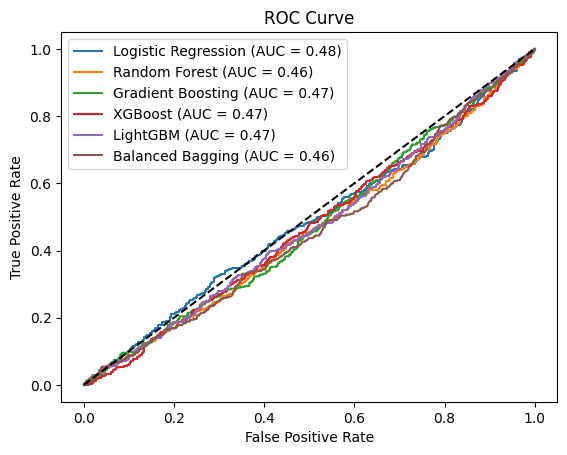


Model Performance:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression    0.5500   0.194279  0.421189  0.265905  0.483589
1        Random Forest    0.6120   0.166381  0.250646  0.200000  0.460634
2    Gradient Boosting    0.5635   0.168033  0.317829  0.219839  0.470778
3              XGBoost    0.6890   0.174515  0.162791  0.168449  0.469807
4             LightGBM    0.6465   0.177419  0.227390  0.199320  0.472187
5     Balanced Bagging    0.6560   0.163311  0.188630  0.175060  0.458856

Best Model:
Model        Logistic Regression
Accuracy                    0.55
Precision               0.194279
Recall                  0.421189
F1 Score                0.265905
ROC AUC                 0.483589
Name: 0, dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedBaggingClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier


# Load the dataset
# Replace 'heart_disease.csv' with your dataset file path
data = pd.read_csv('heart_disease.csv')


# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())


# Check for missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())


# Handle missing values
# Fill missing values with mean for numeric columns and mode for categorical columns
for column in data.columns:
   if data[column].dtype == 'object':
       data[column].fillna(data[column].mode()[0], inplace=True)
   else:
       data[column].fillna(data[column].mean(), inplace=True)


# Check for missing values after handling
print("\nMissing Values After Handling:")
print(data.isnull().sum())


# Data Preprocessing
# Encode categorical variables
categorical_columns = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
                      'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption',
                      'Stress Level', 'Sugar Consumption', 'Heart Disease Status']


label_encoders = {}
for column in categorical_columns:
   le = LabelEncoder()
   data[column] = le.fit_transform(data[column])
   label_encoders[column] = le


# Define features and target variable
X = data.drop('Heart Disease Status', axis=1)
y = data['Heart Disease Status']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Handle class imbalance using SMOTE and ADASYN
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)


# Standardize numerical features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_train_adasyn = scaler.transform(X_train_adasyn)
X_test = scaler.transform(X_test)


# Feature Importance Analysis with Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


# Keep top features based on importance
top_features = feature_importances['Feature'].head(10).values
X_train_smote = pd.DataFrame(X_train_smote, columns=X.columns)[top_features]
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=X.columns)[top_features]
X_test = pd.DataFrame(X_test, columns=X.columns)[top_features]


# Initialize models with hyperparameter tuning
models = {
   'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
   'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=10),
   'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
   'XGBoost': xgb.XGBClassifier(random_state=42, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1])),
   'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=100, learning_rate=0.1, max_depth=7)
}


# Add Ensemble Techniques
ensemble = BalancedBaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42)
models['Balanced Bagging'] = ensemble


# Add Voting Classifier
voting_clf = VotingClassifier(estimators=[
   ('lr', models['Logistic Regression']),
   ('rf', models['Random Forest']),
   ('gb', models['Gradient Boosting']),
   ('xgb', models['XGBoost']),
   ('lgbm', models['LightGBM'])
], voting='soft')
models['Voting Classifier'] = voting_clf


# Hyperparameter tuning for Random Forest (example)
param_grid_rf = {
   'n_estimators': [50, 100, 150],
   'max_depth': [5, 10, 15]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, scoring='f1', cv=3)
grid_search_rf.fit(X_train_smote, y_train_smote)
models['Random Forest'] = grid_search_rf.best_estimator_


# Train and evaluate models
results = []


for model_name, model in models.items():
   print(f"\nTraining {model_name}...")
   try:
       model.fit(X_train_smote, y_train_smote)
       y_pred = model.predict(X_test)
       y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None


       # Calculate metrics
       accuracy = accuracy_score(y_test, y_pred)
       precision = precision_score(y_test, y_pred)
       recall = recall_score(y_test, y_pred)
       f1 = f1_score(y_test, y_pred)
       roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan


       print(f"\n{model_name} Classification Report:")
       print(classification_report(y_test, y_pred))


       results.append({
           'Model': model_name,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': recall,
           'F1 Score': f1,
           'ROC AUC': roc_auc
       })


       # Plot ROC curve if probabilities are available
       if y_pred_proba is not None:
           fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
           plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
   except Exception as e:
       print(f"Error training {model_name}: {e}")


# Show ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)


# Highlight the best-performing model
best_model = results_df.loc[results_df['F1 Score'].idxmax()]
print("\nBest Model:")
print(best_model)

